**Import libraries**

In [62]:
import os
import cv2
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize
from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential


**Unzip the file in the folder bird image**

In [63]:
!unzip /content/drive/MyDrive/Project/new_project/images.zip -d /content/drive/MyDrive/bird_image

Archive:  /content/drive/MyDrive/Project/new_project/images.zip
   creating: /content/drive/MyDrive/bird_image/Images/
  inflating: /content/drive/MyDrive/bird_image/__MACOSX/._Images  
  inflating: /content/drive/MyDrive/bird_image/Images/.DS_Store  
  inflating: /content/drive/MyDrive/bird_image/__MACOSX/Images/._.DS_Store  
   creating: /content/drive/MyDrive/bird_image/Images/Owl/
  inflating: /content/drive/MyDrive/bird_image/__MACOSX/Images/._Owl  
   creating: /content/drive/MyDrive/bird_image/Images/Bald_Eagle/
  inflating: /content/drive/MyDrive/bird_image/__MACOSX/Images/._Bald_Eagle  
   creating: /content/drive/MyDrive/bird_image/Images/Hornbill/
  inflating: /content/drive/MyDrive/bird_image/__MACOSX/Images/._Hornbill  
   creating: /content/drive/MyDrive/bird_image/Images/Woodpecker/
  inflating: /content/drive/MyDrive/bird_image/__MACOSX/Images/._Woodpecker  
  inflating: /content/drive/MyDrive/bird_image/Images/Owl/OWL 217.jpg  
  inflating: /content/drive/MyDrive/bird_

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the images and split in train test and validation**

In [64]:
import shutil
import random
import math

root_dir = '/content/drive/MyDrive/bird_image/Images'
classes = ['Bald_Eagle', 'Hornbill', 'Owl', 'Woodpecker']

for clss in classes:
  print('------------' + clss + '-------------')
  dirtry = root_dir + '/' + clss
  files = os.listdir(dirtry)
  print(dirtry,files)
  np.random.shuffle(files)

  ###----------------------------Create a folder on drive and then run with the name of "new_Image_folder" then run this code
  base_outdir = '/content/drive/MyDrive/clean_data/new_Image_folder'

  for folder in ['train', 'val', 'test']:
    
    target_dir = base_outdir + folder
    os.makedirs(target_dir + '/' + clss)
    target_class = target_dir + '/' + clss

    if folder == 'train':
        images_to_pass = files[: math.floor(0.6*len(files))]
        for img in images_to_pass:
            img = dirtry + '/' + img
            shutil.copy(img, target_class)
    elif folder == 'val':
        images_to_pass = files[math.floor(0.6*len(files)): math.floor(0.8*len(files))]
        for img in images_to_pass:
            img = dirtry + '/' + img
            shutil.copy(img, target_class)
    else:
        images_to_pass = files[math.floor(0.8*len(files)):]
        for img in images_to_pass:
            img = dirtry + '/' + img
            shutil.copy(img, target_class)



------------Bald_Eagle-------------
/content/drive/MyDrive/bird_image/Images/Bald_Eagle ['189.jpg', '162.jpg', '176.jpg', '228.jpg', '214.jpg', '200.jpg', '016.jpg', '002.jpg', '003.jpg', '017.jpg', '201.jpg', '215.jpg', '229.jpg', '177.jpg', '163.jpg', '188.jpg', '149.jpg', '175.jpg', '161.jpg', '203.jpg', '217.jpg', '029.jpg', '001.jpg', '015.jpg', '014.jpg', '028.jpg', '216.jpg', '202.jpg', '160.jpg', '174.jpg', '148.jpg', '170.jpg', '164.jpg', '158.jpg', '206.jpg', '212.jpg', '004.jpg', '010.jpg', '038.jpg', '039.jpg', '011.jpg', '005.jpg', '213.jpg', '207.jpg', '159.jpg', '165.jpg', '171.jpg', '198.jpg', '167.jpg', '173.jpg', '211.jpg', '205.jpg', '239.jpg', '013.jpg', '007.jpg', '006.jpg', '012.jpg', '238.jpg', '204.jpg', '210.jpg', '172.jpg', '166.jpg', '199.jpg', '129.jpg', '101.jpg', '115.jpg', '288.jpg', '277.jpg', '263.jpg', '049.jpg', '075.jpg', '061.jpg', '060.jpg', '074.jpg', '048.jpg', '262.jpg', '276.jpg', '289.jpg', '114.jpg', '100.jpg', '128.jpg', '116.jpg', '102.jpg'

**sample images of Bald_Eagle,Hornbill**

In [65]:
import cv2
from google.colab.patches import cv2_imshow
img_new=os.listdir('/content/drive/MyDrive/clean_data/new_Image_foldertrain/Bald_Eagle')
img_old=os.listdir('/content/drive/MyDrive/clean_data/new_Image_foldertrain/Hornbill')

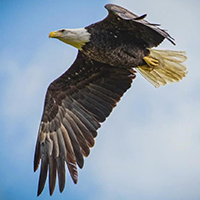

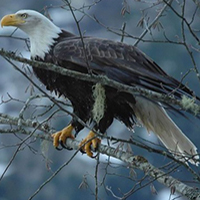

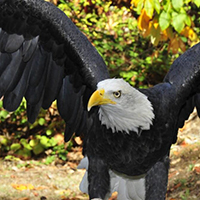

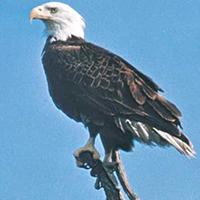

In [66]:
for pic in img_new[1:5]:
  pic1=os.path.join('/content/drive/MyDrive/clean_data/new_Image_foldertrain/Bald_Eagle',pic)
  img=cv2.imread(pic1)
  cv2_imshow(img)


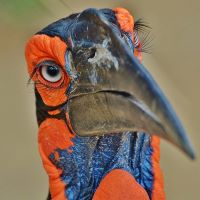

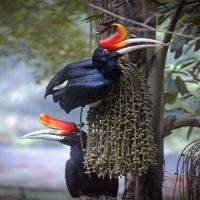

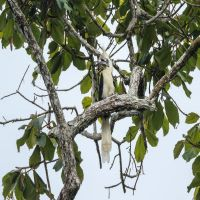

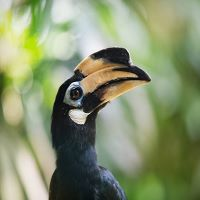

In [67]:
for pic in img_old[1:5]:
  pic1=os.path.join('/content/drive/MyDrive/clean_data/new_Image_foldertrain/Hornbill',pic)
  img=cv2.imread(pic1)
  cv2_imshow(img)

**Train, Val and Test Directories**

In [68]:

base_dir='/content/drive/MyDrive/clean_data/new_Image_folder'
train_dir = '/content/drive/MyDrive/clean_data/new_Image_foldertrain'
validation_dir = '/content/drive/MyDrive/clean_data/new_Image_folderval'
test_dir = '/content/drive/MyDrive/clean_data/new_Image_foldertest'

**Data Augmentation**

In [78]:
# Add our data-augmentation parameters to ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40,width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

val_datagen = ImageDataGenerator( rescale = 1./255., rotation_range = 40,width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

**Train and validation datagen**

In [79]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 10, class_mode = "categorical", target_size = (224, 224))
validation_generator = val_datagen.flow_from_directory(validation_dir, batch_size = 10, class_mode = "categorical", target_size = (224, 224))

Found 723 images belonging to 4 classes.
Found 241 images belonging to 4 classes.


**Pretrained Resnet-101**

In [85]:
from tensorflow.keras.applications import ResNet101

base_model = ResNet101(input_shape=(224, 224,3), include_top=False, weights="imagenet")

171446536/171446536 [==============================] - 10s 0us/step


**Model Freezing**

In [86]:
for layer in base_model.layers:
    layer.trainable = False

**ResNet50 trainabale layers**

In [87]:
# from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential

from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet101(include_top = False,pooling='max'))
base_model.add(Dense(4, activation='softmax'))

**Model compile**

In [88]:

base_model.compile(optimizer ="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Steps during training**

In [89]:
steps_per_epoch = np.ceil((723)/10)
steps_per_epoch_val = np.ceil((241)/10)

**Model Training**

In [91]:
resnet_history = base_model.fit(train_generator,epochs=30, validation_data = validation_generator,steps_per_epoch=steps_per_epoch,validation_steps=steps_per_epoch_val)

Epoch 1/30
73/73 [==============================] - 21s 283ms/step - loss: 1.4143 - accuracy: 0.5864 - val_loss: 2.2782 - val_accuracy: 0.2407
Epoch 2/30
73/73 [==============================] - 19s 265ms/step - loss: 1.1682 - accuracy: 0.6224 - val_loss: 1.7021 - val_accuracy: 0.2697
Epoch 3/30
73/73 [==============================] - 19s 259ms/step - loss: 1.0435 - accuracy: 0.6528 - val_loss: 1.9627 - val_accuracy: 0.2199
Epoch 4/30
73/73 [==============================] - 19s 257ms/step - loss: 0.9514 - accuracy: 0.6805 - val_loss: 1.7776 - val_accuracy: 0.2531
Epoch 5/30
73/73 [==============================] - 19s 255ms/step - loss: 1.0065 - accuracy: 0.6584 - val_loss: 1.8873 - val_accuracy: 0.2490
Epoch 6/30
73/73 [==============================] - 19s 256ms/step - loss: 1.2672 - accuracy: 0.6432 - val_loss: 1.2576 - val_accuracy: 0.4357
Epoch 7/30
73/73 [==============================] - 19s 258ms/step - loss: 0.9413 - accuracy: 0.6874 - val_loss: 1.7406 - val_accuracy: 0.3278

**Plots**

<Figure size 432x288 with 0 Axes>

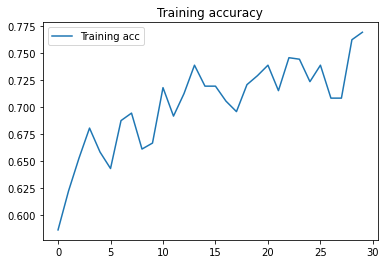

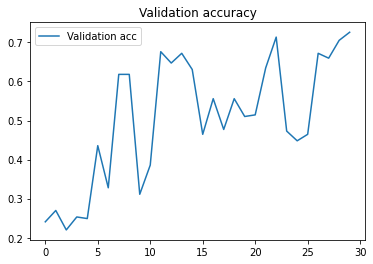

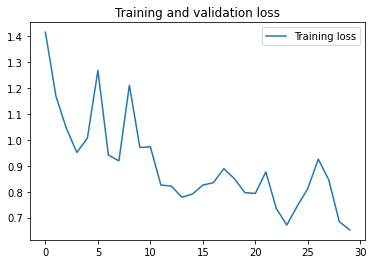

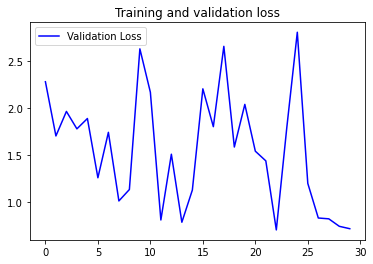

<Figure size 432x288 with 0 Axes>

In [92]:
import matplotlib.pyplot as plt
acc = resnet_history.history['accuracy']
val_acc = resnet_history.history['val_accuracy']
loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']
epochs = range(len(acc))






plt.plot(epochs, acc, label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()



plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Validation accuracy')
plt.legend()
plt.figure()



plt.plot(epochs, loss, label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.figure()




plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

**Model Prediction**

In [93]:
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_data_generator = test_datagen .flow_from_directory(
    test_dir, # Put your path here
     target_size=(228, 228),
    batch_size=20,
    shuffle=False)



Found 244 images belonging to 4 classes.


In [94]:
import numpy as np
test_steps_per_epoch = np.math.ceil(123 / 10)

predictions = base_model.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [95]:
print("the prediction of model is ",predicted_classes)

the prediction of model is  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 2 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 1 3 1 1 1 2 1 1 2 1
 3 1 3 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 0 1 1 1 1 1 1 3 3 1 3 1 1 1 1 1 1 3 1
 1 3 1 1 1 1 1 3 1 2 1 2 2 1 1 2 1 2 2 2 1 2 1 2 1 2 1 2 3 2 1 2 2 1 0 2 2
 2 1 0 2 2 1 2 2 2 1 2 2 2 0 1 2 2 2 1 2 2 2 2 2 0 1 1 2 2 2 2 2 2 1 3 3 3
 3 3 3 3 3 3 3 3 2 3 2 0 3 3 3 1 3 2 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3
 3 3 3 3 3 1 3 2 3 3 2 3 1 3 3 3 3 3 3 1 3 3]


In [96]:
true_classes = test_data_generator.classes
print("the true classes of models is",true_classes)
class_labels = list(test_data_generator.class_indices.keys())
print("the total class labels is",class_labels)

the true classes of models is [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
the total class labels is ['Bald_Eagle', 'Hornbill', 'Owl', 'Woodpecker']


**Classification metrics**

In [97]:
from sklearn import metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

  Bald_Eagle       0.90      0.92      0.91        61
    Hornbill       0.62      0.72      0.67        60
         Owl       0.78      0.62      0.69        61
  Woodpecker       0.78      0.81      0.79        62

    accuracy                           0.77       244
   macro avg       0.77      0.77      0.77       244
weighted avg       0.77      0.77      0.77       244

